In [1]:
import pandas as pd

#affichage des premieres lignes
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
#taille du fichier
print(f"Nombre de lignes : {df.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {df.shape[1]}")  # Nombre de colonnes

In [ ]:
# extraire le type des données 
print(df.dtypes)

In [ ]:
#Résumé statistique (colonnes numériques) :
print(df.describe())  # Moyenne, min, max, etc.

In [2]:
# affiche le nombre de valeurs manquantes (null ou NaN) pour chaque colonne du DataFrame
print(df.isnull().sum())

#affichage du pourcentage des valeurs manquantes pour chaque colonne 
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64


In [3]:
doublons = df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 1103


In [4]:
# Supprimer les doublons (en gardant la première occurrence)
df_unique = df.drop_duplicates()

# Sauvegarder le DataFrame sans doublons dans un nouveau fichier CSV
#df_unique.to_csv('fichier_sans_doublons.csv', index=False)
#print("Le fichier sans doublons a été créé avec succès !")

print(df_unique)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [5]:
doublons = df_unique.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 0


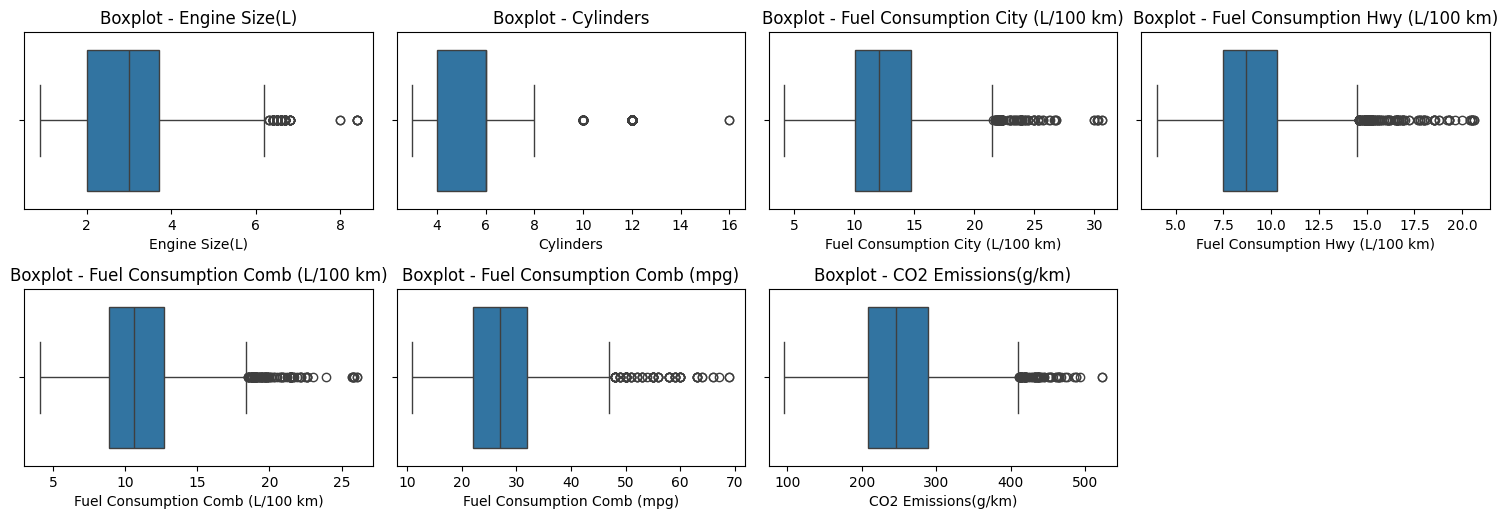

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt
# Colonnes numériques à analyser
colonnes_numeriques = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'
]

# Visualiser les Graphiques Avant Détection
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()



In [7]:
# Fonction pour détecter les valeurs aberrantes
def detecter_valeurs_aberrantes(df, colonnes):
    valeurs_aberrantes = {}
    
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        # Détecter les lignes aberrantes
        valeurs_aberrantes[col] = df[(df[col] < borne_inferieure) | (df[col] > borne_superieure)]
        
        # Afficher les statistiques
        print(f"Colonne: {col}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Borne inférieure: {borne_inferieure}, Borne supérieure: {borne_superieure}")
        print(f"Nombre de valeurs aberrantes: {len(valeurs_aberrantes[col])}\n")
        
    return valeurs_aberrantes

# Détection des valeurs aberrantes
valeurs_aberrantes = detecter_valeurs_aberrantes(df_unique, colonnes_numeriques)

Colonne: Engine Size(L)
Q1: 2.0, Q3: 3.7, IQR: 1.7000000000000002
Borne inférieure: -0.5500000000000003, Borne supérieure: 6.25
Nombre de valeurs aberrantes: 121

Colonne: Cylinders
Q1: 4.0, Q3: 6.0, IQR: 2.0
Borne inférieure: 1.0, Borne supérieure: 9.0
Nombre de valeurs aberrantes: 177

Colonne: Fuel Consumption City (L/100 km)
Q1: 10.1, Q3: 14.7, IQR: 4.6
Borne inférieure: 3.2, Borne supérieure: 21.599999999999998
Nombre de valeurs aberrantes: 116

Colonne: Fuel Consumption Hwy (L/100 km)
Q1: 7.5, Q3: 10.3, IQR: 2.8000000000000007
Borne inférieure: 3.299999999999999, Borne supérieure: 14.500000000000002
Nombre de valeurs aberrantes: 150

Colonne: Fuel Consumption Comb (L/100 km)
Q1: 8.9, Q3: 12.7, IQR: 3.799999999999999
Borne inférieure: 3.200000000000002, Borne supérieure: 18.4
Nombre de valeurs aberrantes: 115

Colonne: Fuel Consumption Comb (mpg)
Q1: 22.0, Q3: 32.0, IQR: 10.0
Borne inférieure: 7.0, Borne supérieure: 47.0
Nombre de valeurs aberrantes: 95

Colonne: CO2 Emissions(g/k

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la suppression des valeurs aberrantes à chaque colonne numérique
for column in df_unique.select_dtypes(include=['float64', 'int64']).columns:
    df_unique = remove_outliers(df_unique, column)

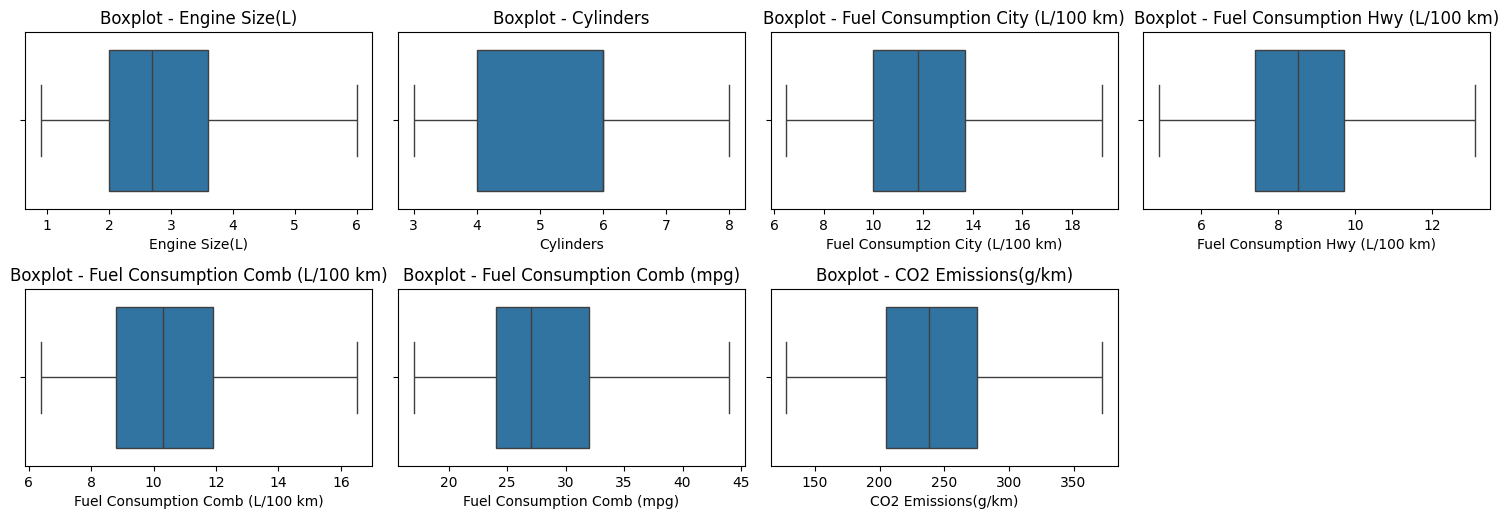

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

 Vérifications de Consistance
a. Relations Logiques

In [22]:
# la conssistance

 
#traitement d'imbalanced 
#"Fuel Consumption City" ≤ "Fuel Consumption Hwy"

incoh_fuel = df_unique[df_unique['Fuel Consumption City (L/100 km)'] > df_unique['Fuel Consumption Hwy (L/100 km)']]
print("\nIncohérences de consommation de carburant :")
print(incoh_fuel[['Make', 'Model', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']])




Incohérences de consommation de carburant :
       Make        Model  Fuel Consumption City (L/100 km)  \
0     ACURA          ILX                               9.9   
1     ACURA          ILX                              11.2   
3     ACURA      MDX 4WD                              12.7   
4     ACURA      RDX AWD                              12.1   
5     ACURA          RLX                              11.9   
...     ...          ...                               ...   
7380  VOLVO  XC40 T5 AWD                              10.7   
7381  VOLVO  XC60 T5 AWD                              11.2   
7382  VOLVO  XC60 T6 AWD                              11.7   
7383  VOLVO  XC90 T5 AWD                              11.2   
7384  VOLVO  XC90 T6 AWD                              12.2   

      Fuel Consumption Hwy (L/100 km)  
0                                 6.7  
1                                 7.7  
3                                 9.1  
4                                 8.7  
5         

Les résultats montrent des incohérences dans les colonnes Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km). Voici l'explication :

1. Définition des Colonnes
Fuel Consumption City (L/100 km) : Consommation de carburant en ville.
Fuel Consumption Hwy (L/100 km) : Consommation de carburant sur autoroute.
En général, Fuel Consumption City devrait être supérieure ou égale à Fuel Consumption Hwy, car les véhicules consomment plus de carburant en ville (arrêts fréquents, embouteillages) que sur autoroute (conduite continue).

4. Solution Proposée
Pour corriger ces incohérences, on peut :

a. Identifier les Lignes Concernées
python
Copier le code
# Filtrer les incohérences
incoh_fuel = df[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)']]
print(incoh_fuel)
b. Correction Automatique (Optionnelle)
Si on suppose que la ville doit toujours être ≥ autoroute, on peut inverser les valeurs incorrectes :

python
Copier le code
# Correction automatique
df.loc[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']] = \
df.loc[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']].values
c. Supprimer les Lignes Incorrectes (Option)
python
Copier le code
# Supprimer les lignes incohérentes
df = df[df['Fuel Consumption City (L/100 km)'] >= df['Fuel Consumption Hwy (L/100 km)']]

In [24]:
incoh_engine = df_unique[(df_unique['Engine Size(L)'] <= 0) | (df_unique['Cylinders'] <= 0)]
print("\nMoteurs avec des tailles ou des cylindres invalides :")
print(incoh_engine[['Make', 'Model', 'Engine Size(L)', 'Cylinders']])


Moteurs avec des tailles ou des cylindres invalides :
Empty DataFrame
Columns: [Make, Model, Engine Size(L), Cylinders]
Index: []


Cela signifie que toutes les données de la colonne "Engine Size(L)" (taille du moteur en litres) et de la colonne "Cylinders" (nombre de cylindres) sont valides selon les critères définis dans le code.

Pourquoi ce test ?
La taille du moteur (Engine Size) et le nombre de cylindres sont des propriétés physiques des véhicules, et il n'a pas de sens qu'un moteur ait une taille nulle ou négative, ou qu'un véhicule ait un nombre de cylindres égal à zéro ou négatif.

Que signifie "Empty DataFrame" ?
Un "Empty DataFrame" signifie qu'après avoir appliqué le filtre (recherche des valeurs invalides), aucune ligne n'a été trouvée qui réponde à cette condition. Cela indique que toutes les données dans ces colonnes sont valides.

In [25]:
# Vérifier si les véhicules électriques ont une consommation et des émissions nulles
incoh_electric = df_unique[(df_unique['Fuel Type'] == 'Electric') & 
                    ((df_unique['Fuel Consumption Comb (L/100 km)'] > 0) | 
                     (df_unique['CO2 Emissions(g/km)'] > 0))]
print("\nVéhicules électriques avec consommation ou émissions incorrectes :")
print(incoh_electric[['Make', 'Model', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])




Véhicules électriques avec consommation ou émissions incorrectes :
Empty DataFrame
Columns: [Make, Model, Fuel Type, Fuel Consumption Comb (L/100 km), CO2 Emissions(g/km)]
Index: []


Cela signifie que toutes les données concernant les véhicules électriques (identifiés par "Fuel Type" avec la valeur "Electric") sont valides selon les critères de vérification définis dans le code.

Le type de carburant est "Electric".
La consommation de carburant est supérieure à 0 (ce qui est incorrect pour un véhicule électrique).
Les émissions de CO2 sont supérieures à 0 (ce qui est également incorrect pour un véhicule électrique).
Résultat vide (Empty DataFrame) : Le fait qu'aucune ligne ne soit retournée signifie qu'il n'y a aucune ligne dans votre jeu de données qui correspond à la condition de consommation ou d'émissions incorrectes pour les véhicules électriques. Cela indique que tous les véhicules électriques dans votre fichier ont des données valides pour la consommation de carburant et les émissions de CO2.

Si un véhicule électrique a une consommation de carburant, cela serait incohérent, car les véhicules électriques ne consomment pas de carburant liquide (essence ou diesel).
Si un véhicule électrique a des émissions de CO2, cela serait également incohérent, car les véhicules électriques n'émettent pas de CO2 pendant leur fonctionnement

Pourquoi ce test ?
Les véhicules électriques doivent avoir une consommation de carburant égale à 0 (ou absente) et des émissions de CO2 égales à 0. S'ils ont des valeurs non nulles dans ces colonnes, cela signifie qu'il y a une incohérence dans les données.

Que signifie "Empty DataFrame" ?
Un "Empty DataFrame" signifie qu'après avoir appliqué le filtre (recherche des incohérences), aucune ligne n'a été trouvée qui réponde à cette condition. Cela signifie que tous les véhicules électriques dans votre jeu de données ont des valeurs cohérentes (c'est-à-dire une consommation de carburant nulle ou absente et des émissions de CO2 nulles).

In [46]:
#Consommation de Carburant Trop Faible/Élevée
incoh_fuel_comb = df_unique[(df_unique['Fuel Consumption Comb (L/100 km)'] <= 2) | 
                     (df['Fuel Consumption Comb (L/100 km)'] > 25)]
print("\nConsommation de carburant combinée suspecte :")
print(incoh_fuel_comb[['Make', 'Model', 'Fuel Consumption Comb (L/100 km)']])



Consommation de carburant combinée suspecte :
Empty DataFrame
Columns: [Make, Model, Fuel Consumption Comb (L/100 km)]
Index: []


C:\Users\airac\AppData\Local\Temp\ipykernel_17896\510679036.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incoh_fuel_comb = df_unique[(df_unique['Fuel Consumption Comb (L/100 km)'] <= 2) |


Cela signifie que les véhicules listés ont des consommations de carburant combinées relativement élevées (de l'ordre de 25.7 à 26.1 L/100 km), ce qui peut être considéré comme suspect pour certains types de véhicules, surtout en tenant compte de leur type (vans et véhicules utilitaires de grande taille). Ces valeurs de consommation peuvent être anormalement élevées pour certains modèles par rapport à des véhicules similaires.

In [47]:
incoh_co2 = df_unique[df_unique['CO2 Emissions(g/km)'] <= 0]
print("\nEmissions CO2 non valides :")
print(incoh_co2[['Make', 'Model', 'CO2 Emissions(g/km)']])


Emissions CO2 non valides :
Empty DataFrame
Columns: [Make, Model, CO2 Emissions(g/km)]
Index: []


signifie que aucune émission de CO2 non valide n'a été détectée dans votre dataset pour les véhicules.

Le code vérifie la validité des valeurs dans la colonne CO2 Emissions(g/km). L'objectif est de détecter les valeurs qui pourraient être incorrectes, comme des émissions de CO2 qui seraient trop élevées ou trop basses, voire nulles pour certains types de véhicules (par exemple, pour les véhicules électriques, les émissions de CO2 devraient être proches de zéro).

In [ ]:
def evaluer_consistance(df):
    incoherences = {}

    # Consommation de carburant
    incoherences['fuel'] = df[df['Fuel Consumption City (L/100 km)'] > df['Fuel Consumption Hwy (L/100 km)']]#0000
    
    # Moteurs et Cylindres invalides
    incoherences['engine'] = df[(df['Engine Size(L)'] <= 0) | (df['Cylinders'] <= 0)]#0000

    # Emissions CO2 négatives
    incoherences['co2'] = df[df['CO2 Emissions(g/km)'] <= 0] #0000

    # Consommation anormale
    incoherences['fuel_comb'] = df[(df['Fuel Consumption Comb (L/100 km)'] <= 2) | #0000
                                   (df['Fuel Consumption Comb (L/100 km)'] > 25)]

    # Véhicules électriques incorrects
    incoherences['electric'] = df[(df['Fuel Type'] == 'Electric') & 
                                  ((df['Fuel Consumption Comb (L/100 km)'] > 0) | #0000
                                   (df['CO2 Emissions(g/km)'] > 0))]

    # Affichage des incohérences
    for key, value in incoherences.items():
        print(f"\nIncohérences détectées dans {key}:")
        print(value)

# Exécuter l'évaluation
evaluer_consistance(df)


In [39]:
# Correction Automatique (Optionnelle)
#Si on suppose que la ville doit toujours être ≥ autoroute, on peut inverser les valeurs incorrectes :


# Correction automatique
df_unique.loc[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']] = \
df_unique.loc[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']].values

In [45]:
# vrerification 
incoh_fuel = df_unique[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)']]

if incoh_fuel.empty:
    print("Toutes les incohérences ont été corrigées, les cities consomme plus ")
else:
    print("Certaines incohérences persistent :")
    print(incoh_fuel[['Make', 'Model', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']])


Toutes les incohérences ont été corrigées, les cities consomme plus 
